Рекурсивное решение



In [1]:
# неэффективное решение
def F(n):
    if n < 2:
        return 1
    else:
        return F(n - 1) + F(n - 2)
print(F(35))

14930352


Нерекурсивное решение

In [8]:
n=40
F=[0]*(n + 1)
F[0]=1
F[1]=1
for i in range(2, n + 1):
    F[i] = F[i - 2] + F[i - 1]
print(F)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141]


Модификации задачи о кузнечике

In [9]:
F = [0] * (n + 1)
F[0] = 1
F[1] = F[0]
F[2] = F[1] + F[0]
for i in range(3, n + 1):
    F[i] = F[i - 3] + F[i - 2] + F[i - 1]
print(F)

[1, 1, 2, 4, 7, 13, 24, 44, 81, 149, 274, 504, 927, 1705, 3136, 5768, 10609, 19513, 35890, 66012, 121415, 223317, 410744, 755476, 1389537, 2555757, 4700770, 8646064, 15902591, 29249425, 53798080, 98950096, 181997601, 334745777, 615693474, 1132436852, 2082876103, 3831006429, 7046319384, 12960201916, 23837527729]


In [10]:
n=10
Map=[0,1,2,3,4,5,6,7,7,8,9]
F = [0] * (n + 1)
F[0] = 1
for i in range(1, n + 1):
    if Map[i] == 0:
        F[i] = 0
    else:
        F[i] = sum(F[max(0,i-3):i])
print(F)

[1, 1, 2, 4, 7, 13, 24, 44, 81, 149, 274]


In [11]:
n = 10
Prices = [0, 5, 3, 8, 6, 1, 9, 4, 2, 7, 5] 

C = [0] * (n + 1)
C[1] = Prices[1]
for i in range(2, n + 1):
    C[i] = min(C[i - 1], C[i - 2]) + Prices[i]
print(C)



[0, 5, 3, 11, 9, 10, 18, 14, 16, 21, 21]


In [12]:
n = 10
Prev= [0, 5, 3, 8, 6, 11, 9, 4, 8, 7, 9]
Price= [0, 5, 3, 8, 6, 1, 9, 4, 2, 7, 34]
C = [0] * (n + 1)
C[1] = Price[1]
Prev[1] = 0
for i in range(2, n + 1):
    if C[i - 1] < C[i - 2]:
        C[i] = C[i - 1] + Price[i]
        Prev[i] = i - 1
    else:
        C[i] = C[i - 2] + Price[i]
        Prev[i] = i - 2
print(C)

[0, 5, 3, 11, 9, 10, 18, 14, 16, 21, 50]


In [13]:
Path = []
i = n
while i > 0:
    Path.append(i)
    i = Prev[i]
Path.append(0)
Path = Path[::-1]
print(Path)

[0, 2, 4, 5, 7, 8, 10]


In [14]:
Path = []
i = n
while i > 0:
    if C[i - 1] < C[i - 2]:
        prev = i - 1
    else:
        prev = i - 2
    Path.append(prev)
    i = prev
Path.append(0)
Path = Path[::-1]
print(Path)

[0, 0, 2, 4, 5, 7, 8]


7.Решите задачу о количестве способов достичь точки n из точки 1, если кузнечик умеет прыгать +1, +2 и *2.

In [15]:
def func(N):
    if N<=1:
        return 1
    d=[0]*(N+1)
    d[1]=1
    for i in range(2,N+1):
        d[i]+=d[i-1]
        d[i]+=d[i-2]
        if i%2==0:
            d[i]+=d[i//2]
    return d[N]
N = int(input(('Введите значение N: ')))
result = func(N)
print(f'Кол-во способов достичь {N} из точки 1: {result}')

Введите значение N: 40
Кол-во способов достичь 40 из точки 1: 307071818


со стоимостью


Введите значение n: 40
Введите значение l: 8
Минимальная сумма достигала 40: 632
Цены за выбранные ступеньки: [8, 32, 72, 152, 312, 632]
Индексы выбранных ступенёк: [1, 3, 5, 10, 20, 40]
Полная цена за выбранные ступеньки: [8, 32, 72, 152, 312, 632]


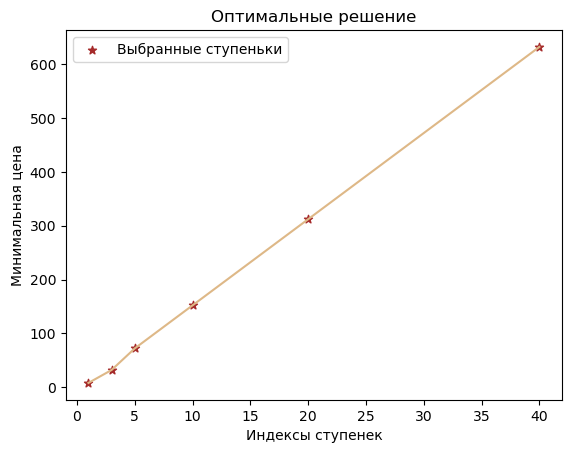

In [16]:
import matplotlib.pyplot as plt


def pr_method(n, l):
    if n <= 0:
        return 0

    price = [0] * (n + 1)
    for i in range(1, n + 1):
        price[i] = price[i - 1] + l

    dp = [0] * (n + 1)
    dp[1] = price[1]
    dp[2] = price[2] + dp[1]
    dp[3] = min(dp[2], dp[1]) + price[3]

    path = [[] for _ in range(n + 1)]
    path[1] = [1]
    path[2] = [1, 2]
    path[3] = [1, 3]

    for i in range(3, n + 1):
        dp[i] = min(dp[i - 1], dp[i - 2]) + price[i]
        if dp[i - 1] < dp[i - 2]:
            path[i] = path[i - 1] + [i]
        else:
            path[i] = path[i - 2] + [i]
        if i % 2 == 0:
            if dp[i // 2] + price[i] < dp[i]:
                dp[i] = dp[i // 2] + price[i]
                path[i] = path[i // 2] + [i]

    price_optimal_path = [price[i] for i in path[n]]
    ind_optim_path = path[n]

    return dp[n], price_optimal_path, ind_optim_path


n = int(input('Введите значение n: '))
l = int(input('Введите значение l: '))
result, prices, indices = pr_method(n, l)

full_price = [0] * len(prices)

for i in range(len(full_price)):
    full_price[i] = full_price[i - 1] + prices[i]

print(f'Минимальная сумма достигала {n}: {result}')
print('Цены за выбранные ступеньки:', full_price)
print('Индексы выбранных ступенёк:', indices)
print('Полная цена за выбранные ступеньки:', full_price)

x = indices
y = full_price


plt.scatter(x, y, color='brown', marker='*', label='Выбранные ступеньки')
plt.plot(x, y, color='burlywood')
plt.xlabel('Индексы ступенек')
plt.ylabel('Минимальная цена')
plt.title('Оптимальные решение')
plt.legend()
plt.show()
